# Implement a 2-layer Neural Network using Backpropagation

In [159]:
# Import packages
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

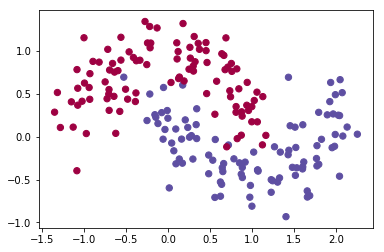

In [160]:
# Generate a toy dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [161]:
# Define helper functions

def predict(W, X):
    
    # Forward pass
    z_h1 = np.dot(X, W['W_input_h1']) + W['b_input_h1']
    a_h1 = np.tanh(z_h1)

    z_h2 = np.dot(a_h1, W['W_h1_h2']) + W['b_h1_h2']
    a_h2 = np.tanh(z_h2)
    output = np.dot(a_h2, W['W_h2_output']) + W['b_h2_output']

    probs = sigmoid(output)
    probs = probs.squeeze()
    
    predictions = np.zeros(probs.shape[0])
    predictions[probs>0.5] = 1
    
    return predictions

def cross_entropy_loss(t_hat, t):
    return np.sum(-(t*np.log(t_hat) + (1-t)*np.log(1-t_hat)))

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x)*(1-sigmoid(x))

def tanh_grad(x):
    return 1 - np.tanh(x)**2

def plot_decision_boundary(W):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = predict(W, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 

In [162]:
# Create the model architecture
input_dim = 2
nodes_hidden_1 = 3
nodes_hidden_2 = 3
output_dim = 1

W = {
    'W_input_h1' : np.random.rand(input_dim, nodes_hidden_1),
    'b_input_h1' : np.random.rand(nodes_hidden_1),

    'W_h1_h2' : np.random.rand(nodes_hidden_1, nodes_hidden_2),
    'b_h1_h2' : np.random.rand(nodes_hidden_2),

    'W_h2_output' : np.random.rand(nodes_hidden_2, output_dim),
    'b_h2_output' : np.random.rand(output_dim)
}

In [163]:
# Train using Gradient Descent

learning_rate = 0.01
no_epochs = 200000

for epoch in range(no_epochs):

    # Forward pass
    z_h1 = np.dot(X, W['W_input_h1']) + W['b_input_h1']
    #print(z_h1[1,1])
    a_h1 = np.tanh(z_h1)
    #print( W['W_input_h1'])  
    
    z_h2 = np.dot(a_h1, W['W_h1_h2']) + W['b_h1_h2']
    #print(z_h2.shape)
    a_h2 = np.tanh(z_h2)
    #print(a_h2.shape)
    output = np.dot(a_h2, W['W_h2_output']) + W['b_h2_output']
    #print(W['W_input_h1'].shape)
    
    probs = sigmoid(output)
    probs = probs.squeeze()
    
    #~~~~~~~~~~~ YOUR CODE BEGINS HERE ~~~~~~~~~~~~~~~~
    
    delta3 = (probs - y).reshape(200,1)
    #print(delta3.shape)
    #print(W['W_h2_output'].shape)
    #print(a_h1.shape)
    dWout = a_h2.T @ delta3
    dbout = np.sum(delta3, axis=0, keepdims=True).reshape(output_dim,)
    delta2 = delta3 @ W['W_h2_output'].T * (1 - np.power(a_h1, 2))
    dW2 = a_h1.T @ delta2
    #print(dW2.shape)
    db2 = np.sum(delta2, axis=0, keepdims=True).reshape(nodes_hidden_2,)
    delta1 = delta2 @ W['W_h1_h2'].T * (1 - np.power(a_h2, 2))
    dW1 = X.T @ delta1
    #print(dW1.shape)
    db1 = np.sum(delta1, axis=0, keepdims=True).reshape(nodes_hidden_1,)
    #print(W['b_input_h1'].shape)
    
    # Gradient Descent
    W['W_input_h1'] += -1 * learning_rate * dW1
    W['b_input_h1'] += -1 * learning_rate * db1
    W['W_h1_h2'] += -1 * learning_rate * dW2
    W['b_h1_h2'] += -1 * learning_rate * db2
    W['W_h2_output'] += -1 * learning_rate * dWout        
    W['b_h2_output'] += -1 * learning_rate * dbout
    
    #~~~~~~~~~~~ YOUR CODE ENDS HERE ~~~~~~~~~~~~~~~~~~

    loss = cross_entropy_loss(probs, y)
    
    if epoch%100 == 0:
        print("Loss after epoch ", epoch, " : ", loss)

Loss after epoch  0  :  157.625124238
Loss after epoch  100  :  73.9199094631
Loss after epoch  200  :  73.9178409273
Loss after epoch  300  :  73.9178409272
Loss after epoch  400  :  73.9178409272
Loss after epoch  500  :  73.9178409272
Loss after epoch  600  :  73.9178409272
Loss after epoch  700  :  73.9178409272
Loss after epoch  800  :  73.9178409272
Loss after epoch  900  :  73.9178409272
Loss after epoch  1000  :  73.9178409272
Loss after epoch  1100  :  73.9178409272
Loss after epoch  1200  :  73.9178409272
Loss after epoch  1300  :  73.9178409272
Loss after epoch  1400  :  73.9178409272
Loss after epoch  1500  :  73.9178409272
Loss after epoch  1600  :  73.9178409272
Loss after epoch  1700  :  73.9178409272
Loss after epoch  1800  :  73.9178409272
Loss after epoch  1900  :  73.9178409272
Loss after epoch  2000  :  73.9178409272
Loss after epoch  2100  :  73.9178409272
Loss after epoch  2200  :  73.9178409272
Loss after epoch  2300  :  73.9178409272
Loss after epoch  2400  :  7

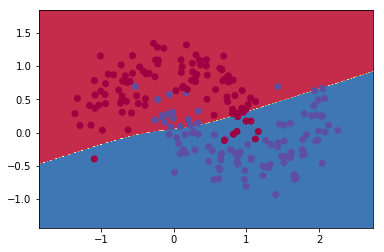

In [164]:
# Plot the decision boundary
plot_decision_boundary(W)